Portfolio Credit Risk HW2
Hannah Wang

In [23]:
import numpy as np
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats, optimize, integrate

# Question 1

In [2]:
PD = np.array([norm.ppf(0.5), norm.ppf(0.4), norm.ppf(0.3), norm.ppf(0.2), norm.ppf(0.1)])

In [3]:
def Monte_Carlo(R, Num):
    M = [0,0,0,0,0]
    count = 0
    A = np.array(np.random.normal(0,1,5))
    A_ = A.dot(R)
    for i in range(5):
        if A_[i] < PD[i]:
            M[i] = 1
            count += 1
    Num.append(count)
    return count

## 1.1 For the following collection of five firms, simulate 10,000 runs to find the standard deviation of the number of defaults.

In [4]:
corr_matrix_1 = np.array([[1,0.05, 0.1,0.15, 0.2],
                     [0.05,1,0.25, 0.3, 0.35],
                     [0.1,0.25, 1,0.4, 0.45],
                     [0.15, 0.3, 0.4, 1, 0.5],
                     [0.2,0.35,0.45,0.5,1]])
R_1 = scipy.linalg.cholesky(corr_matrix_1)
Num_1 = []

In [5]:
for i in range(10000):
    Monte_Carlo(R_1, Num_1)

In [6]:
print('The standard deviation of the number of defaults is %.2g'%np.std(Num_1))

The standard deviation of the number of defaults is 1.2


## 1.2 Simulate again to find the standard deviation of the number of defaults when all off-diagonal correlations are set equal to zero instead of the values shown.

In [7]:
corr_matrix_2 = np.identity(5)
R_2 = scipy.linalg.cholesky(corr_matrix_2)
Num_2 = []

In [8]:
for i in range(10000):
    Monte_Carlo(R_2, Num_2)

In [9]:
print('The standard deviation of the number of defaults is %.2g'%np.std(Num_2))

The standard deviation of the number of defaults is 0.98


#  Question 2

In [10]:
rho = np.linspace(0,0.95,num=100)

In [11]:
STD = []
for r in rho:
    Num_r = []
    corr_matrix_r = np.array([[1,r,r,r,r],
                     [r,1,r,r,r],
                     [r,r,1,r,r],
                     [r,r,r,1,r],
                     [r,r,r,r,1]])
    R_r = scipy.linalg.cholesky(corr_matrix_r)
    for i in range(1000):
        Monte_Carlo(R_r, Num_r)
    STD.append(np.std(Num_r))

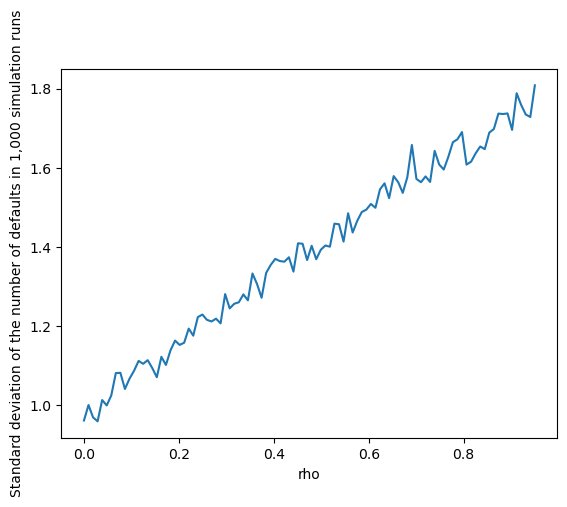

In [12]:
plt.plot(rho, STD)
plt.xlabel('rho')
plt.ylabel('Standard deviation of the number of defaults in 1,000 simulation runs')
plt.show()

# Question 3

## 3.1 Prob[ D4 = 1 and D5 = 1]? (What is PDJ for these two firms?)

In [13]:
def pdj(rho, PD1, PD2):
    a = scipy.stats.multivariate_normal(mean=[0,0], cov=[[1,rho],[rho,1]], allow_singular=True)
    pdj = a.cdf([scipy.stats.norm.ppf(PD1),scipy.stats.norm.ppf(PD2)]) 
    return pdj

In [14]:
print("Prob[ D4 = 1 and D5 = 1] = %.2g" %pdj(0.45, 0.4, 0.5))

Prob[ D4 = 1 and D5 = 1] = 0.27


## 3.2 Prob[ D4 = 1 and D5 = 1| D3 =1 ]? (That is, what is the probability that both Firm 4 and Firm 5 default, given that Firm 3 defaults?)

We know that Prob[ D4 = 1 and D5 = 1| D3 =1 ] = PDJ345 / PD3

In [15]:
def pdj3(rho_matrix, PD1, PD2, PD3):
    a = scipy.stats.multivariate_normal(mean=np.zeros(3),cov=rho_matrix, allow_singular=True)
    pdj3 = a.cdf([scipy.stats.norm.ppf(PD1),scipy.stats.norm.ppf(PD2), scipy.stats.norm.ppf(PD3)])
    return pdj3

In [16]:
rho_matrix = np.matrix([[1, 0.35, 0.4],[0.35, 1, 0.45],[0.4,0.45,1]])
PDJ_3 = pdj3(rho_matrix, 0.3, 0.4, 0.5)

In [17]:
print("Prob[ D4 = 1 and D5 = 1| D3 =1 ] = %.2g" % (PDJ_3 / 0.3))

Prob[ D4 = 1 and D5 = 1| D3 =1 ] = 0.44


## 3.3 What is the portfolio expected loss rate as a fraction of the $2800 exposure?

In [18]:
Expected_Loss = 0.1*0.1*700+0.2*0.2*600+0.3*0.3*500+0.4*0.4*400+0.5*0.5*300+0.4*0.6*200+0.5*0.7*100
Expected_Loss

298.0

In [19]:
print("Expected loss rate as a fraction of the $2800 exposure is %.2g." % (Expected_Loss / 2800))

Expected loss rate as a fraction of the $2800 exposure is 0.11.


## 3.4 What is the correlation between D3 and D4?

In [20]:
def Dcorr(PD1, PD2, PDJ):
    corr = (PDJ - PD1*PD2) / np.sqrt(PD1*(1.-PD1)*PD2*(1.-PD2))
    return corr

In [24]:
def rho(PD1, PD2, PDJ12):
    def pdj(rho, PD1, PD2, PDJ12):   
        a = stats.multivariate_normal(mean=[0,0], cov=[[1,rho],[rho,1]], allow_singular=True)
        pdj = a.cdf([stats.norm.ppf(PD1),stats.norm.ppf(PD2)])-PDJ12
        return pdj
    rho = optimize.fsolve(pdj, 0, args=(PD1, PD2, PDJ12))
    return rho[0]

In [26]:
PDJ_34 = pdj(0.35, 0.3, 0.4)
print("The rho of D3 and D4 IS %.2g" % (rho(0.3, 0.4,PDJ_34)))
print("Correlation between D3 and D4 is %.2g." % Dcorr(0.3,0.4,PDJ_34))

The rho of D3 and D4 IS 0.35
Correlation between D3 and D4 is 0.22.


# Question 4

In [28]:
def F_xy(x,y):
    return 1/4 * x * (2 + 3 * x - y) * y
def invX(q):
    return 1/6 * (-1 + np.sqrt(1 + 48 * q))
def invY(q):
    return 1/2 * (5 - np.sqrt(25 - 16 * q))

In [29]:
pdj = F_xy(invX(0.1), invY(0.2))
print("The PDJ is %.2g" % pdj)

The PDJ is 0.025


In [30]:
print("The default corrolation is %.2g" % (Dcorr(0.1, 0.2,pdj)))

The default corrolation is 0.039


In [31]:
print("The rho is %.2g" % (rho(0.1, 0.2,pdj)))

The rho is 0.09
